In [29]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.7 MB/s eta 0:00:00


In [32]:
!pip install tqdm

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from tqdm import tqdm

# importing the dataset

In [2]:
print("sklearn",sklearn.__version__)

sklearn 1.5.2


In [3]:
data = pd.read_csv("updated_dataset.csv")

In [4]:
data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,Total Value (Cr),Total Volume (Mn)
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021.0,7980.58,24.16
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021.0,7478.58,24.31
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021.0,6238.13,21.91
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021.0,5280.04,18.43
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021.0,4338.53,15.45


In [5]:
UPI_Banks = list(data["UPI Banks"].values)
print(UPI_Banks)

['Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Andhra Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance B

#Computing Covariance Matrix

Covariance Matrix:
                          Volume (Mn) By Costumers  Value (Cr) by Costumers  \
Volume (Mn) By Costumers              4.340021e+04             8.313828e+06   
Value (Cr) by Costumers               8.313828e+06             1.607859e+09   
Volume (Mn)                           4.369026e+04             8.344055e+06   
Value (Cr)                            8.352649e+06             1.612180e+09   
Month                                 5.964134e+01             1.082275e+04   
Year                                 -1.308154e+01            -2.477190e+03   
Total Value (Cr)                      1.666648e+07             3.220039e+09   
Total Volume (Mn)                     8.709047e+04             1.665788e+07   

                           Volume (Mn)    Value (Cr)         Month  \
Volume (Mn) By Costumers  4.369026e+04  8.352649e+06     59.641341   
Value (Cr) by Costumers   8.344055e+06  1.612180e+09  10822.754136   
Volume (Mn)               4.408172e+04  8.390073e+06     61

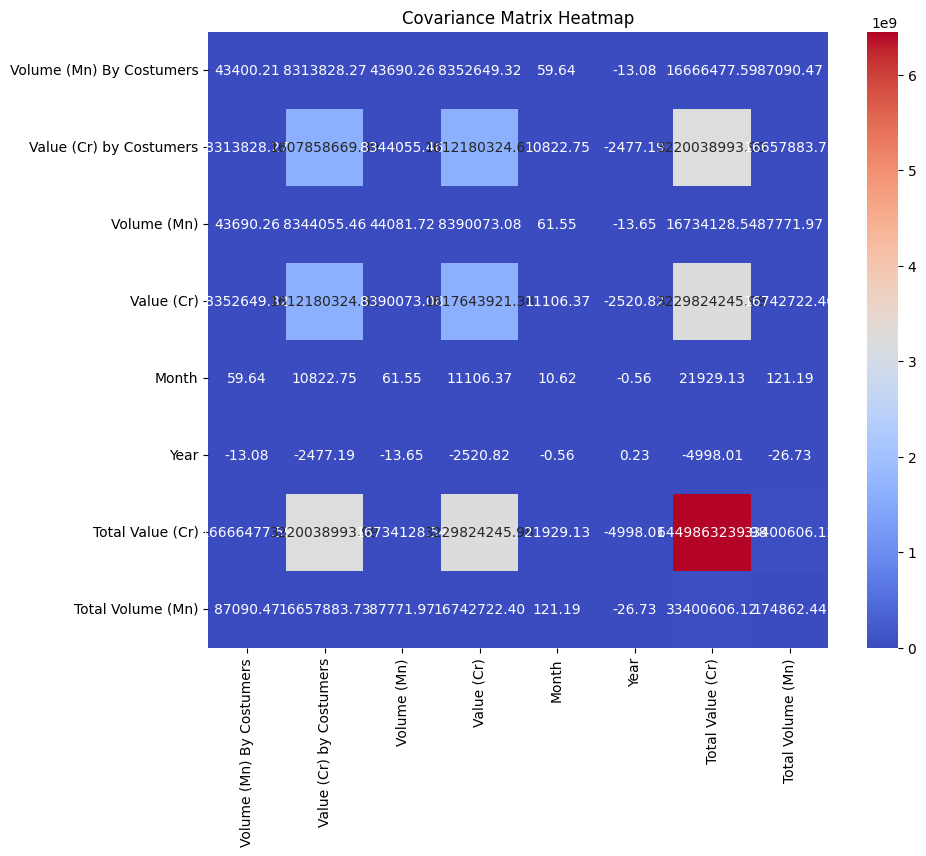

In [6]:
# Selecting numerical columns for covariance computation
numerical_columns = [
    "Volume (Mn) By Costumers",
    "Value (Cr) by Costumers",
    "Volume (Mn)",
    "Value (Cr)",
    "Month",
    "Year",
    "Total Value (Cr)",
    "Total Volume (Mn)"
]

# Calculating the covariance matrix
cov_matrix = data[numerical_columns].cov()

# Displaying the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Optionally, you can visualize the covariance matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()

#Applying normalization because we have too many extreme values alongside less extreme values, to avoid bias towards extreme values we can applying min max scaling.

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the numerical columns to normalize, excluding the target "Total Value (Cr)"
numerical_columns_to_normalize = [
    "Volume (Mn) By Costumers",
    "Value (Cr) by Costumers",
    "Volume (Mn)",
    "Value (Cr)",
    "Month",
    "Year",
    "Total Volume (Mn)"
]

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler and transforming the selected numerical columns
data[numerical_columns_to_normalize] = scaler.fit_transform(data[numerical_columns_to_normalize])

# Display the normalized data
print("Normalized Data:")
print(data.head())

Normalized Data:
                   UPI Banks  Volume (Mn) By Costumers  \
0  Airtel Payments Bank Apps                  0.004346   
1  Airtel Payments Bank Apps                  0.004043   
2  Airtel Payments Bank Apps                  0.003653   
3  Airtel Payments Bank Apps                  0.003321   
4  Airtel Payments Bank Apps                  0.002951   

   Value (Cr) by Costumers  Volume (Mn)  Value (Cr)     Month  Year  \
0                 0.005698     0.007273    0.014527  1.000000   0.0   
1                 0.004875     0.007648    0.014077  0.909091   0.0   
2                 0.003779     0.006883    0.012030  0.818182   0.0   
3                 0.003854     0.005540    0.009527  0.727273   0.0   
4                 0.003539     0.004476    0.007455  0.636364   0.0   

   Total Value (Cr)  Total Volume (Mn)  
0           7980.58           0.005810  
1           7478.58           0.005846  
2           6238.13           0.005268  
3           5280.04           0.004431  
4 

#Performing EDA on Pre-processed data.

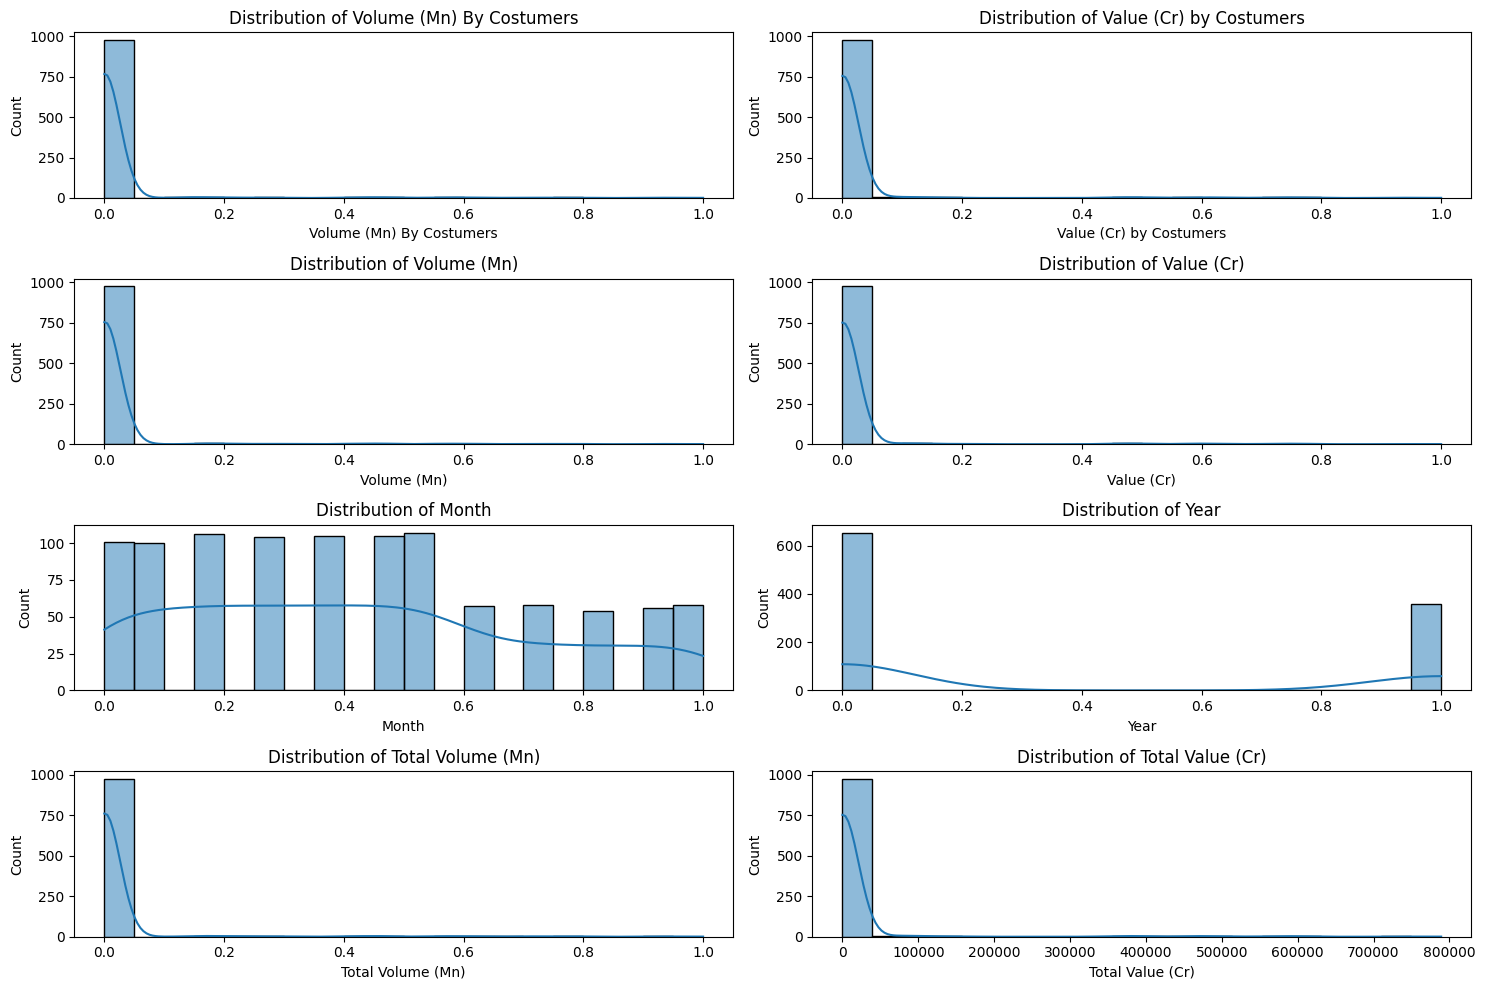

In [8]:
import scipy.stats as stats

# List of numerical columns
numerical_columns = [
    "Volume (Mn) By Costumers",
    "Value (Cr) by Costumers",
    "Volume (Mn)",
    "Value (Cr)",
    "Month",
    "Year",
    "Total Volume (Mn)",
    "Total Value (Cr)"
]

# Plotting histograms and KDE for each numerical feature
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

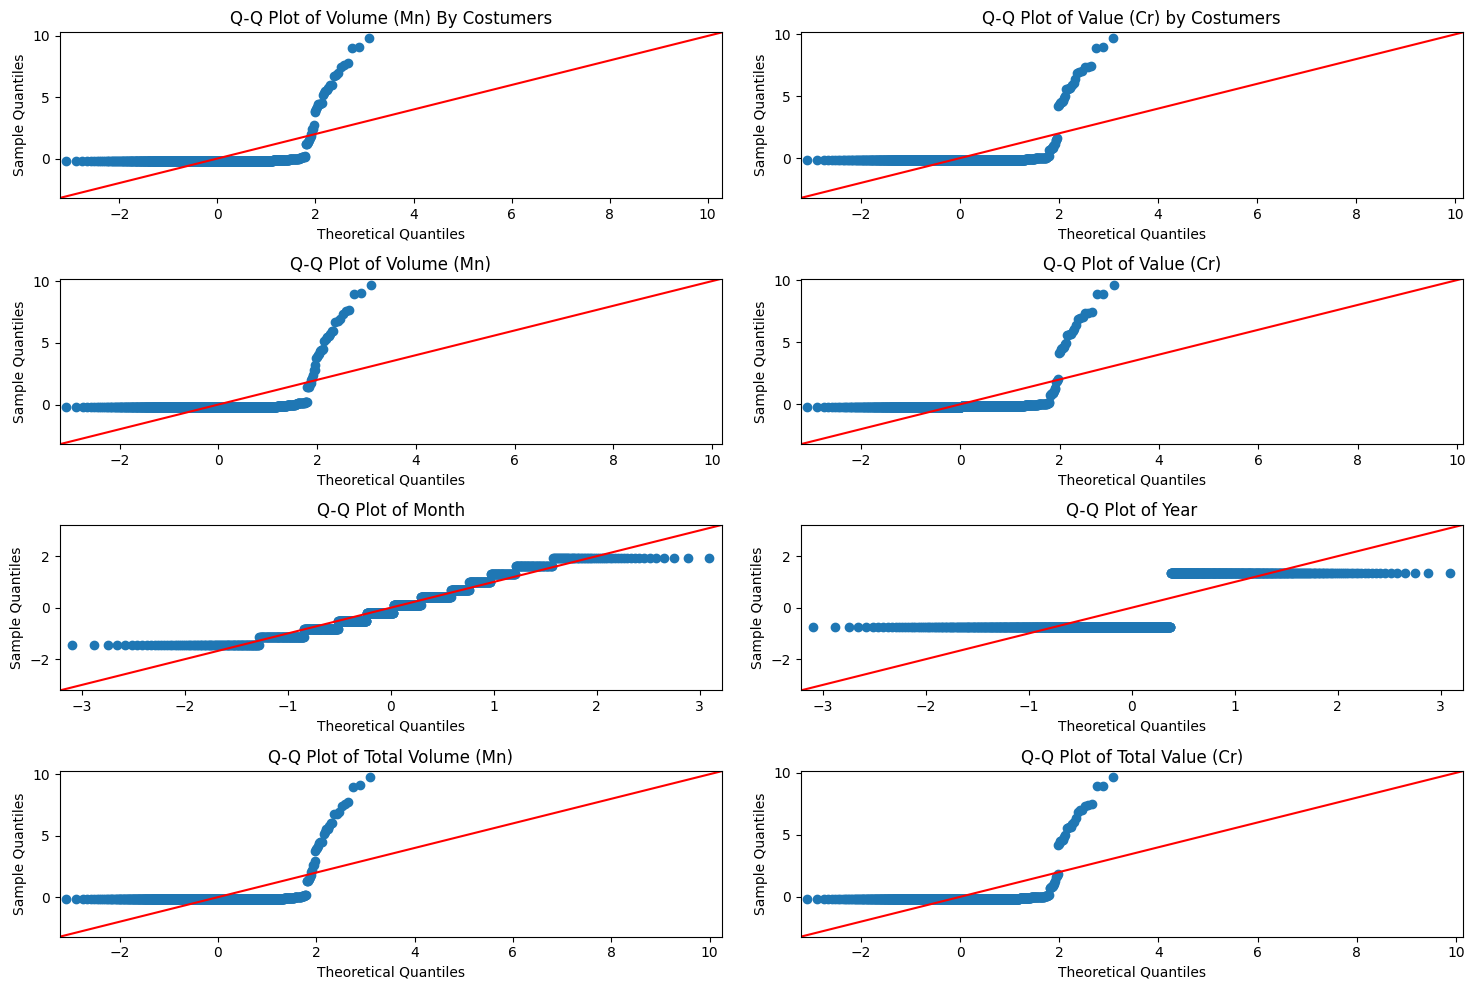

In [9]:
import statsmodels.api as sm

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sm.qqplot(data[column], line='45', fit=True, ax=plt.gca())
    plt.title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()

###### Shapiro-Wilk test provides a statistical measure. A p-value < 0.05 suggests the data is not normally distributed.

In [10]:
from scipy.stats import shapiro

# Running Shapiro-Wilk test for each numerical feature
for column in numerical_columns:
    stat, p = shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}:')
    print(f'Statistic = {stat}, p-value = {p}\n')

Shapiro-Wilk Test for Volume (Mn) By Costumers:
Statistic = 0.17605954600955132, p-value = 1.3304462455726462e-54

Shapiro-Wilk Test for Value (Cr) by Costumers:
Statistic = 0.16939683180182064, p-value = 9.747432456910069e-55

Shapiro-Wilk Test for Volume (Mn):
Statistic = 0.18458344896946022, p-value = 1.9869772579994947e-54

Shapiro-Wilk Test for Value (Cr):
Statistic = 0.17290490788570434, p-value = 1.1479239675737616e-54

Shapiro-Wilk Test for Month:
Statistic = 0.944012394526548, p-value = 4.1823821766875336e-19

Shapiro-Wilk Test for Year:
Statistic = 0.6044281380622926, p-value = 5.1390243067004924e-43

Shapiro-Wilk Test for Total Volume (Mn):
Statistic = 0.18028325289548564, p-value = 1.6222695522876048e-54

Shapiro-Wilk Test for Total Value (Cr):
Statistic = 0.1711518306156845, p-value = 1.0577657489211005e-54



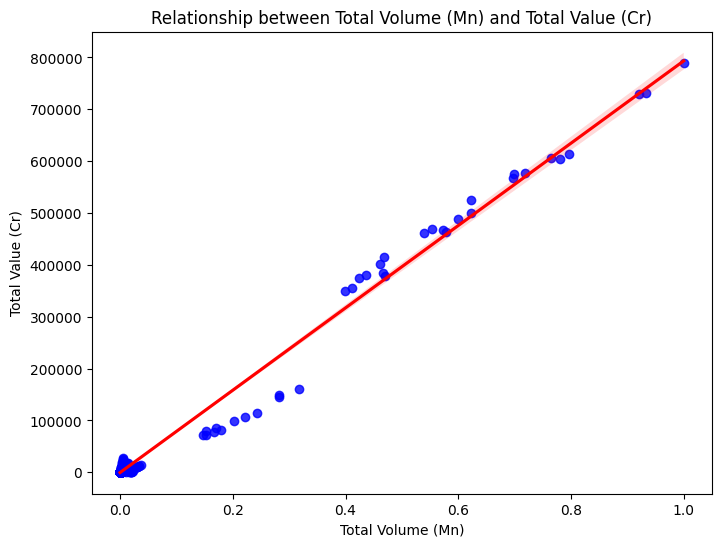

In [11]:
# Scatter plot to visualize the relationship between Total Volume (Mn) and Total Value (Cr)
plt.figure(figsize=(8, 6))
sns.regplot(x="Total Volume (Mn)", y="Total Value (Cr)", data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Relationship between Total Volume (Mn) and Total Value (Cr)')
plt.xlabel('Total Volume (Mn)')
plt.ylabel('Total Value (Cr)')
plt.show()

As from the above graph we can clearly observe that as the "Total_Volume (Mn)" one of the independent feature increases the "Total Value (Cr)" also increases

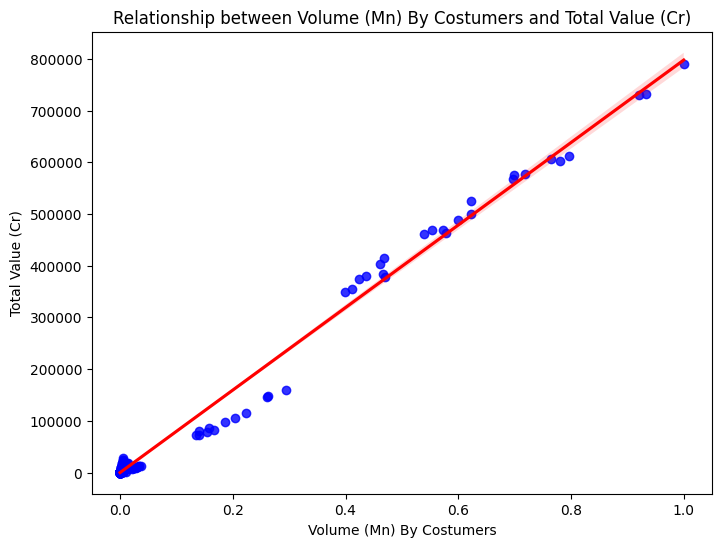

In [13]:
# Scatter plot to visualize the relationship between Total Volume (Mn) and Total Value (Cr)
plt.figure(figsize=(8, 6))
sns.regplot(x="Volume (Mn) By Costumers", y="Total Value (Cr)", data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Relationship between Volume (Mn) By Costumers and Total Value (Cr)')
plt.xlabel('Volume (Mn) By Costumers')
plt.ylabel('Total Value (Cr)')
plt.show()

As from the above graph we can clearly observe that as the "Volume (Mn) By Costumers" one of the independent feature increases the "Total Value (Cr)" also increases

In [14]:
data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,Total Value (Cr),Total Volume (Mn)
0,Airtel Payments Bank Apps,0.004346,0.005698,0.007273,0.014527,1.000000,0.0,7980.58,0.005810
1,Airtel Payments Bank Apps,0.004043,0.004875,0.007648,0.014077,0.909091,0.0,7478.58,0.005846
2,Airtel Payments Bank Apps,0.003653,0.003779,0.006883,0.012030,0.818182,0.0,6238.13,0.005268
3,Airtel Payments Bank Apps,0.003321,0.003854,0.005540,0.009527,0.727273,0.0,5280.04,0.004431
4,Airtel Payments Bank Apps,0.002951,0.003539,0.004476,0.007455,0.636364,0.0,4338.53,0.003713


In [16]:
data['UPI Banks'].value_counts()

,count
UPI Banks,
Mobikwik,19
Ultracash,19
Samsung Pay,19
Cointab,19
Bajaj Finserv,19
...,...
WhatsApp*,1
Freecharge,1
Goibibo,1


In [17]:
UPI_Banks = list(data["UPI Banks"].values)
print(UPI_Banks)

['Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Andhra Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance B

Converting UPI Banks names into numerical representation using label encoder.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'UPI Banks' column to numerical format
data['UPI Banks'] = label_encoder.fit_transform(data['UPI Banks'])

# Check the transformed data
print(data['UPI Banks'].head())

# Optionally, you can also check the mappings of the labels to their encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping: ", label_mapping)

0    2
1    2
2    2
3    2
4    2
Name: UPI Banks, dtype: int64
Label Mapping:  {'AU Small Finance Bank App': 0, 'AU Small Finance Bank Apps': 1, 'Airtel Payments Bank Apps': 2, 'Allahabad Bank App': 3, 'Allahabad Bank Apps': 4, 'Amazon Pay': 5, 'Andhra Bank App': 6, 'Axis Bank Apps': 7, 'BHIM': 8, 'Bajaj Finserv': 9, 'Bajaj Markets': 10, 'Bandhan Bank Apps': 11, 'Bank of Baroda Apps': 12, 'Bank of India App': 13, 'Bank of India Apps': 14, 'Bank of Maharashtra App': 15, 'Bank of Maharashtra Apps': 16, 'Canara Bank App': 17, 'Canara Bank Apps': 18, 'Central Bank of India App': 19, 'Central Bank of India Apps': 20, 'Citi Bank App': 21, 'Citi Bank Apps': 22, 'City Union Bank App': 23, 'City Union Bank Apps': 24, 'Cointab': 25, 'Cred': 26, 'DBS Digibank App': 27, 'DBS Digibank Apps': 28, 'Dena Bank App': 29, 'Dena Bank Apps': 30, 'Deutsche Bank App': 31, 'Deutsche Bank Apps': 32, 'Dhanlaxmi Bank App': 33, 'Dhanlaxmi Bank Apps': 34, 'Equitas Small Finance Bank Apps': 35, 'Fave': 36, 'Feder

In [23]:
x = data.drop(columns='Total Value (Cr)',axis = 1)
y = data['Total Value (Cr)']
# used drop method to drop the total value column, since that is what we need to predict

In [24]:
x.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,Total Volume (Mn)
0,2,0.004346,0.005698,0.007273,0.014527,1.000000,0.0,0.005810
1,2,0.004043,0.004875,0.007648,0.014077,0.909091,0.0,0.005846
2,2,0.003653,0.003779,0.006883,0.012030,0.818182,0.0,0.005268
3,2,0.003321,0.003854,0.005540,0.009527,0.727273,0.0,0.004431
4,2,0.002951,0.003539,0.004476,0.007455,0.636364,0.0,0.003713


In [25]:
print(y)

0       7980.58
1       7478.58
2       6238.13
3       5280.04
4       4338.53
         ...   
1006     179.40
1007     210.78
1008     206.68
1009     177.90
1010     116.62
Name: Total Value (Cr), Length: 1011, dtype: float64


In [26]:
print(y.head())

0    7980.58
1    7478.58
2    6238.13
3    5280.04
4    4338.53
Name: Total Value (Cr), dtype: float64


In [27]:
print(x.head())

   UPI Banks  Volume (Mn) By Costumers  Value (Cr) by Costumers  Volume (Mn)  \
0          2                  0.004346                 0.005698     0.007273   
1          2                  0.004043                 0.004875     0.007648   
2          2                  0.003653                 0.003779     0.006883   
3          2                  0.003321                 0.003854     0.005540   
4          2                  0.002951                 0.003539     0.004476   

   Value (Cr)     Month  Year  Total Volume (Mn)  
0    0.014527  1.000000   0.0           0.005810  
1    0.014077  0.909091   0.0           0.005846  
2    0.012030  0.818182   0.0           0.005268  
3    0.009527  0.727273   0.0           0.004431  
4    0.007455  0.636364   0.0           0.003713  


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,Total Volume (Mn)
694,14,0.000067,0.000117,0.000067,0.000117,0.545455,1.0,0.000067
265,49,0.001858,0.002611,0.001858,0.002611,0.909091,0.0,0.001858
318,55,0.000096,0.000257,0.000096,0.000257,0.454545,0.0,0.000096
649,119,0.000635,0.000153,0.000635,0.000153,0.454545,0.0,0.000635
785,43,0.000029,0.000009,0.000029,0.000009,0.000000,1.0,0.000029
...,...,...,...,...,...,...,...,...
106,8,0.012139,0.020876,0.012139,0.020876,0.909091,0.0,0.012139
270,49,0.000992,0.001035,0.000992,0.001035,0.454545,0.0,0.000992
860,69,0.000857,0.000545,0.000857,0.000545,0.363636,1.0,0.000857
435,79,0.000173,0.000138,0.000173,0.000138,0.818182,0.0,0.000173


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [64]:
class LassoRegressionGD:
    def __init__(self, alpha=0.1, learning_rate=0.01, n_iterations=1000):
        self.alpha = alpha  # Regularization strength
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None  # Weights

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)

        for i in range(self.n_iterations):
                predictions = X.dot(self.w)
                # Compute the gradients
                error = predictions - y
                gradient = (2/m) * X.T.dot(error) + self.alpha * np.sign(self.w)  # L1 penalty

                # Update the weights
                self.w -= self.learning_rate * gradient

                # Proximal operator for Lasso (soft thresholding)
                self.w = np.sign(self.w) * np.maximum(0, np.abs(self.w) - self.alpha * self.learning_rate)

    def predict(self, X):
        return X.dot(self.w)

    def score(self, X, y):
        predictions = self.predict(X)
        return -mean_squared_error(y, predictions)

    def get_params(self, deep=True):
        return {"alpha": self.alpha, "learning_rate": self.learning_rate, "n_iterations": self.n_iterations}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [65]:
param_space = {
    'alpha': (1e-5, 10.0, 1e-6, 1e-7, 1e-8, 1e-4),  # Regularization strength
    'learning_rate': (1e-5, 1e-1, 1e-3, 1e-4, 1e-7),  # Learning rate
    'n_iterations': (100, 1000, 2500, 3000, 5000)  # Number of iterations for gradient descent
}

# Initialize the Lasso Regression with Gradient Descent
lasso_gd = LassoRegressionGD()

In [66]:
bayes_search = BayesSearchCV(
    estimator=lasso_gd,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for the Bayesian search
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores for computation
    verbose=0  # Display progress
)

In [70]:
progress_bar = tqdm(total=50)
def fit_with_progress(*args, **kwargs):
    result = bayes_search.fit(*args, **kwargs)
    progress_bar.update(100)
    return result


  0%|          | 0/50 [02:41<?, ?it/s]


In [71]:
fit_with_progress(X_train_scaled, y_train)
progress_bar.close()

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.1, 1000] before, using random point [1e-05, 0.001, 1000]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.1, 1000] before, using random point [10.0, 0.0001, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.1, 1000] before, using random point [0.0001, 1e-07, 2500]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10.0, 0.1, 1000] before, using random point [10.0, 0.001, 5000]
  warnings.warn(

  2%|▏         | 1/50 [03:46<3:04:53, 226.41s/it]


In [72]:
print("Best Hyperparameters:", bayes_search.best_params_)

Best Hyperparameters: OrderedDict([('alpha', 10.0), ('learning_rate', 0.1), ('n_iterations', 1000)])


In [73]:
# Train the model using the best parameters
lasso_model = bayes_search.best_estimator_

In [74]:
# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

In [41]:
# Print the results DataFrame to verify its content
print(results_df.head())

          alpha  max_iter  mean_test_score  std_test_score
0  1.000000e+01       272         0.999622        0.000177
1  1.000000e-05       896         0.999657        0.000202
2  1.000000e-05       563         0.999557        0.000238
3  1.000000e-06       373         0.999483        0.000262
4  1.000000e-07       609         0.999573        0.000232


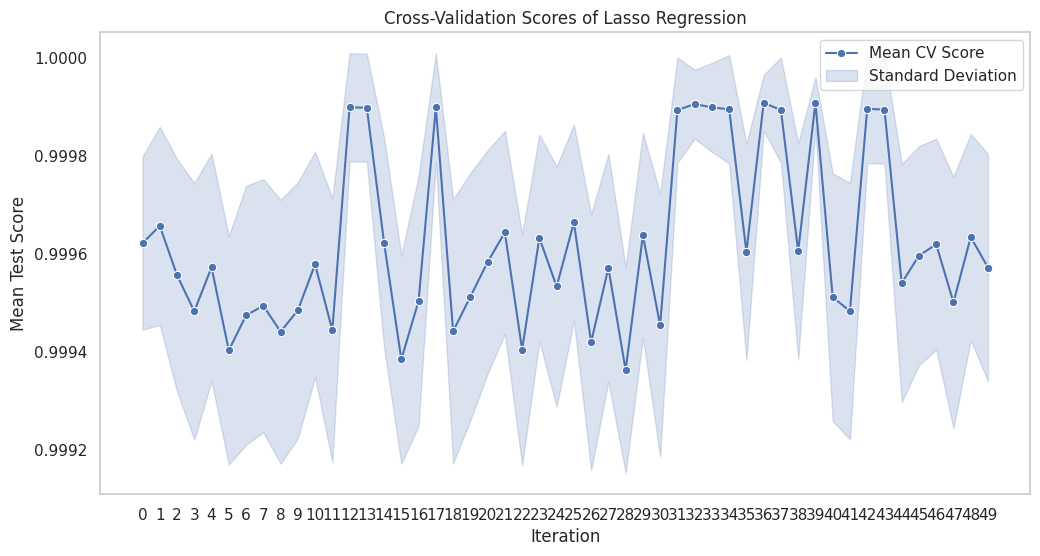

In [42]:
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the mean cross-validation scores
sns.lineplot(data=results_df, x=results_df.index, y='mean_test_score', marker='o', label='Mean CV Score')

# Fill the area between the mean score ± std deviation
plt.fill_between(results_df.index,
                 results_df['mean_test_score'] - results_df['std_test_score'],
                 results_df['mean_test_score'] + results_df['std_test_score'],
                 color='b', alpha=0.2, label='Standard Deviation')

# Customize the plot
plt.title('Cross-Validation Scores of Lasso Regression')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(ticks=results_df.index)  # Show all iterations on x-axis
plt.legend()
plt.grid()
plt.show()

Implement gradient descent algorithm to optimize the model to reduce the residuals.

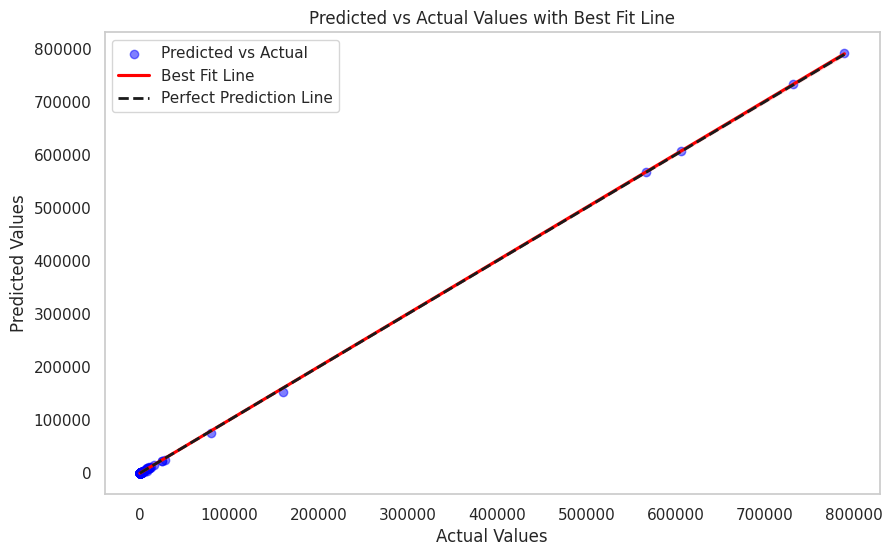

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Add a best fit line
sns.regplot(x=ytest, y=y_pred, scatter=False, color='red', label='Best Fit Line')

# Customize the plot
plt.title('Predicted vs Actual Values with Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pickle

# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

In [ ]:
# Save the LabelEncoder object as a .pkl file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)